# DSC PHASE 1 MICROSOFT STUDIO FILM ANALYSIS

## 1. BUSINESS UNDERSTANDING

## 2. IMPORTING ALL NEEDED LIBRARIES

In [3]:
#import all libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!ls

MICROSOFT STUDIO FILM ANALYSIS.ipynb
README.md
learn-co-curriculum dsc-phase-1-project master zippedData


## 3. IMPORTING DATA 

In [3]:
#Importing data from bom.movie_gross.csv.gz
movie_gross = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
#Importing data from imdb.name.basics.csv.gz
name_basics = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.name.basics.csv.gz')
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [5]:
#Importing from imdb.title.akas.csv.gz
title_akas = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.akas.csv.gz')
title_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [6]:
#Importing  from imdb.title.basics.csv.gz
title_basics  = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.basics.csv.gz')
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [7]:
#Importing from imdb.title.crew.csv.gz
title_crew = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.crew.csv.gz')
title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [8]:
#Importing from imdb.title.principals.csv.gz
title_principals = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.principals.csv.gz')
title_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [9]:
#Importing from imdb.title.ratings.csv.gz
title_ratings  = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/imdb.title.ratings.csv.gz')
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [10]:
#Importing from rt.movie_info.tsv.gz
movie_info = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/rt.movie_info.tsv.gz', delimiter="\t", index_col=0)
movie_info

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


In [11]:
#Importing from rt.reviews.tsv.gz
reviews = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='windows-1252', index_col=0)
reviews

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...
2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"


In [4]:
#Importing from tn.movie_budgets.csv.gz
movie_budgets = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/tn.movie_budgets.csv.gz', index_col=0)
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [13]:
#Importing from tmdb.movies.csv.gz
movies = pd.read_csv('learn-co-curriculum dsc-phase-1-project master zippedData/tmdb.movies.csv.gz', index_col=0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## 4. DATA CLEANING

1.) We are going to clean movie_gross as we are going to use it for analysis.

In [24]:
#Dropping all rows where the domestic gross is null
domdrp_movie_gross = movie_gross.dropna(subset='domestic_gross')

#Dropping all rows where foreign gross is null
foredrp_movie_gross = domdrp_movie_gross.dropna(subset='foreign_gross')

#Dropping all rows where the studio is null
cleaned_movie_gross = foredrp_movie_gross.dropna(subset='studio')

In [25]:
#converting foriegn gross to float
cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].str.replace(',', '')
cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].astype(float)
cleaned_movie_gross

C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_14832\864249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].str.replace(',', '')
C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_14832\864249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].astype(float)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


2.) We are going to clean name_basics as we are going to use it for analysis.

In [26]:
#Dropping all columns(birth year and death year)
name_basics1 = name_basics.drop(labels=['birth_year', 'death_year'], axis=1)
name_basics1.dropna(subset='known_for_titles', inplace=True)
name_basics1

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...
606640,nm9989854,Layla Louise,"actress,stunts","tt9910102,tt9898328,tt9335490,tt8894778"
606642,nm9990296,Fleurette Dicaire,NaN,tt8319420
606644,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610"


3.) We are going to clean title_basics as we are going to use it for analysis.

In [28]:
#Dropping the column runtime_minutes as we will not need it and has numerous null values.
#itle_basics.drop(labels='runtime_minutes', axis = 1 ,inplace=True)
title_basics

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,NaN


4.) We are going to clean title_crew as we are going to use it for analysis.

In [29]:
#Dropping columns writers has numerous missing columns
title_crew1 = title_crew.drop(labels='writers', axis=1)
title_crew1

,tconst,directors
0,tt0285252,nm0899854
1,tt0438973,NaN
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,"nm0089502,nm2291498,nm2292011"
...,...,...
146139,tt8999974,nm10122357
146140,tt9001390,nm6711477
146141,tt9001494,"nm10123242,nm10123248"
146142,tt9004986,nm4993825


5.) We are going to clean title principals as we are going to use it for analysis.

In [30]:
#We are going to drop the columns(job and characters)
title_principals1 = title_principals.drop(labels=['job', 'characters'], axis=1)
title_principals1

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress
...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor
1028182,tt9692684,2,nm4929530,self
1028183,tt9692684,3,nm10441594,director
1028184,tt9692684,4,nm6009913,writer


6.) We are going to clean title_ratings as we are going to use it for analysis.

In [31]:
#We aren't going to alter the dataframe as it is clean
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


7.) We are going to clean movie_budgets as we are going to use it for analysis.

In [5]:
#Strip the columns of the $ sign
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.strip('$')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$')

#replacing the commas with space
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')

                                                            


In [6]:
#Change datatype to integers
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)


In [7]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(int)
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)

movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00
79,"Apr 2, 1999",Following,6000,48482,2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03


8.) We are going to clean movies as we are going to use it for analysis.

In [97]:
#Converting release_date to dataetime object dtype
#movies['release_date'] = pd.to_datetime(movies['release_date'])
movies


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### JOINING title_ratings AND title_basics

In [32]:
titlenames_ratings = pd.merge(title_basics, title_ratings, how='inner', on='tconst')
titlenames_ratings

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5


#### Joining titlenames_ratings with title_principals, name_basics and title_crew

In [33]:
half_imdb = pd.merge(titlenames_ratings, title_principals1, how='inner', on='tconst')
half_imdb

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,10,nm0006210,composer
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,1,nm0474801,actor
2,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,2,nm0904537,actress
3,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,3,nm0756379,actor
4,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,4,nm0474876,actor
...,...,...,...,...,...,...,...,...,...,...
629750,tt9916160,Drømmeland,Drømmeland,2019,Documentary,6.5,11,3,nm2768724,producer
629751,tt9916160,Drømmeland,Drømmeland,2019,Documentary,6.5,11,4,nm4241788,composer
629752,tt9916160,Drømmeland,Drømmeland,2019,Documentary,6.5,11,5,nm6969694,cinematographer
629753,tt9916160,Drømmeland,Drømmeland,2019,Documentary,6.5,11,6,nm3256778,editor


In [34]:
half_imdb1  =pd.merge(half_imdb, name_basics1, how='inner', on='nconst')
half_imdb1

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,10,nm0006210,composer,Naushad,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,1,nm0474801,actor,Dilip Kumar,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667"
2,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,2,nm0904537,actress,Vyjayanthimala,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547"
3,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,3,nm0756379,actor,Balraj Sahni,"actor,writer,director","tt0055039,tt0043307,tt0234827,tt0233326"
4,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,4,nm0474876,actor,Sanjeev Kumar,actor,"tt0148841,tt0215517,tt0073707,tt0178186"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621230,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5,3,nm7817936,actor,Pau Escobar,actor,"tt8176280,tt4857878,tt1986825,tt8178754"
621231,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5,5,nm1716653,director,Laura Jou,"miscellaneous,actress,director","tt1164999,tt0464141,tt5151924,tt1649419"
621232,tt9916160,Drømmeland,Drømmeland,2019,Documentary,6.5,11,1,nm6460816,self,Nils Leidal,NaN,tt3698384
621233,tt9916160,Drømmeland,Drømmeland,2019,Documentary,6.5,11,2,nm5684093,director,Joost van der Wiel,"director,cinematographer,writer","tt2927550,tt4000564"


In [36]:
complete_imdb  = pd.merge(half_imdb1, title_crew1, how='inner', on='tconst')
complete_imdb

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles,directors
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,10,nm0006210,composer,Naushad,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,1,nm0474801,actor,Dilip Kumar,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,2,nm0904537,actress,Vyjayanthimala,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,3,nm0756379,actor,Balraj Sahni,"actor,writer,director","tt0055039,tt0043307,tt0234827,tt0233326",nm0712540
4,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,4,nm0474876,actor,Sanjeev Kumar,actor,"tt0148841,tt0215517,tt0073707,tt0178186",nm0712540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621230,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,"Comedy,Horror",9.2,5,5,nm10532895,producer,Andre Neweling,"cinematographer,editor,producer",tt9903952,nm10532891
621231,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,Documentary,8.7,218,5,nm4942142,director,Tarvo Mölder,"director,actor","tt7716654,tt1678635,tt3686032",nm4942142
621232,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,Documentary,8.7,218,6,nm7375115,composer,Garry Ferrier,"composer,music_department","tt4743796,tt5510188,tt9904844,tt6531908",nm4942142
621233,tt9913056,Swarm Season,Swarm Season,2019,Documentary,6.2,5,1,nm1502645,director,Sarah Christman,"miscellaneous,director,editor","tt10012842,tt3118730,tt0398932,tt9913056",nm1502645


#### CHECKING FOR DUPLICATES

In [42]:
complete_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621235 entries, 0 to 621234
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tconst              621235 non-null  object 
 1   primary_title       621235 non-null  object 
 2   original_title      621235 non-null  object 
 3   start_year          621235 non-null  int64  
 4   genres              616196 non-null  object 
 5   averagerating       621235 non-null  float64
 6   numvotes            621235 non-null  int64  
 7   ordering            621235 non-null  int64  
 8   nconst              621235 non-null  object 
 9   category            621235 non-null  object 
 10  primary_name        621235 non-null  object 
 11  primary_profession  601230 non-null  object 
 12  known_for_titles    621235 non-null  object 
 13  directors           617784 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 71.1+ MB


## 5. EXPLORATORY DATA ANALYSIS

In [66]:
cleaned_movie_gross['Total_gross'] = cleaned_movie_gross['domestic_gross'] + cleaned_movie_gross['foreign_gross']
cleaned_movie_gross

C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_14832\3012742549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross['Total_gross'] = cleaned_movie_gross['domestic_gross'] + cleaned_movie_gross['foreign_gross']


,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [67]:
cleaned_movie_gross.sort_values('Total_gross', ascending=False, inplace=True)
cleaned_movie_gross.head(20)

C:\Users\Mark Jacob\AppData\Local\Temp\ipykernel_14832\4159809302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross.sort_values('Total_gross', ascending=False, inplace=True)


,title,studio,domestic_gross,foreign_gross,year,Total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


#### Analysis of the joined table titlenames_ratings dataframes to see if there between genres and their ratings 

In [123]:
#Sorting the averagerating from the highest to lowest
titlenames_ratings = titlenames_ratings.sort_values('averagerating', ascending=False)



Documentary                  6836
Drama                        4065
Comedy                       1209
Comedy,Drama                  819
Biography,Documentary         444
                             ... 
Drama,Fantasy,War               1
Comedy,Family,Thriller          1
Action,Family,Thriller          1
Action,Biography,Thriller       1
Biography,Thriller              1
Name: genres, Length: 680, dtype: int64

In [136]:
titlenames_ratings['genres']  = titlenames_ratings['genres'].str.split(',', expand=True)[0]
titlenames_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


#### Identifying which genres have many ratings over 7.0 and plotting on a barchart

In [149]:
most_common_genres = titlenames_ratings.loc[titlenames_ratings['averagerating'] >= 9, 'genres'] .value_counts().index.tolist()
most_common_genres_count = titlenames_ratings.loc[titlenames_ratings['averagerating'] >= 9, 'genres'] .value_counts().values.tolist()


#### PLOTTING A BARCHART

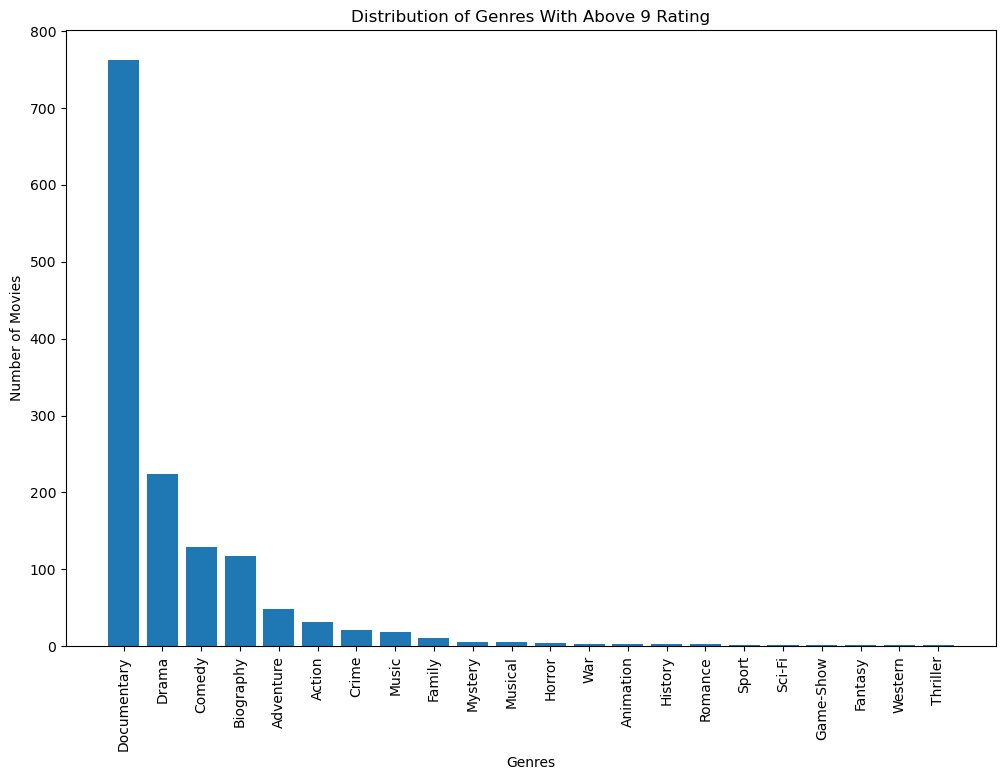

In [151]:
Ratings_genres, ax = plt.subplots(figsize=(12,8))

ax.bar(most_common_genres, most_common_genres_count)

ax.set_xlabel("Genres")
ax.set_ylabel("Number of Movies")
ax.set_title("Distribution of Genres With Above 9 Rating")
ax.tick_params(axis="x", labelrotation=90);

#### ANALYSIS OF THE complete_imdb DATAFRAME

In [54]:
complete_imdb_over9 = complete_imdb[complete_imdb['averagerating'] >= 9]
complete_imdb_over9

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles,directors
80,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,8,nm0347899,self,Gulzar,"music_department,writer,soundtrack","tt0091256,tt0178186,tt1010048,tt2176013",nm4827297
81,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,3,nm0080315,self,Mahesh Bhatt,"director,producer,writer","tt0083578,tt0088031,tt0211126,tt0307873",nm4827297
82,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,4,nm0007131,self,Subhash Ghai,"writer,producer,actor","tt0453729,tt0102844,tt0107311,tt0119861",nm4827297
83,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,10,nm0403984,self,Zakir Hussain,"music_department,composer,soundtrack","tt0078788,tt2555736,tt0296621,tt0176016",nm4827297
84,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,7,nm1213521,editor,Jabeen Merchant,"editor,editorial_department,actress","tt3742284,tt0326722,tt0116763,tt0920464",nm4827297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621210,tt9866708,Wild Karnataka,Wild Karnataka,2019,Documentary,9.9,10,1,nm5943474,director,Amoghavarsha,"director,cinematographer,writer","tt3204032,tt3183392,tt4953736","nm5943474,nm4989042"
621211,tt9866708,Wild Karnataka,Wild Karnataka,2019,Documentary,9.9,10,2,nm4989042,director,Kalyan Varma,"cinematographer,camera_department,miscellaneous","tt7860116,tt4168608,tt9866708,tt6950604","nm5943474,nm4989042"
621212,tt9866708,Wild Karnataka,Wild Karnataka,2019,Documentary,9.9,10,3,nm5943475,producer,Vijay Mohan Raj,"writer,producer","tt3183392,tt3204032","nm5943474,nm4989042"
621213,tt9866708,Wild Karnataka,Wild Karnataka,2019,Documentary,9.9,10,4,nm2764243,composer,Ricky Kej,composer,"tt1733516,tt4440564,tt1094576,tt9866708","nm5943474,nm4989042"


In [47]:
complete_imdb_over8_directors = complete_imdb_over8[complete_imdb_over8['category'] == 'director']
complete_imdb_over8_directors

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles,directors
87,tt6597248,Kaagaz Ki Kashti,Kaagaz Ki Kashti,2017,Documentary,9.2,113,5,nm4827297,director,Brahmanand S. Singh,"director,writer,producer","tt10366116,tt7482222,tt6597248,tt7743400",nm4827297
418,tt6744360,Lost Transmissions,Lost Transmissions,2019,Drama,8.5,12,5,nm3598014,director,Katharine O'Brien,"director,writer,editor","tt2433590,tt6744360,tt1505075,tt1549145",nm3598014
447,tt9527740,Michel Legrand: Sans demi-mesure,Michel Legrand: Sans demi-mesure,2018,"Biography,Documentary,Music",8.9,85,5,nm1071389,director,Gregory Monro,"actor,writer,director","tt4061726,tt1181840,tt5635898,tt2949354",nm1071389
929,tt1688227,Karma Road,Karma Road,2010,Drama,8.3,7,5,nm3979907,director,Mihir Pathak,"actor,writer,producer","tt1045658,tt2431502,tt2184980,tt1688227",nm3979907
952,tt1754826,Urban Crazy,Urban Crazy,2010,"Documentary,Drama",8.7,6,5,nm3937783,director,Wendy Crouse,"producer,director,editor","tt6399124,tt9723738,tt4608526,tt3511354",nm3937783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621210,tt9866708,Wild Karnataka,Wild Karnataka,2019,Documentary,9.9,10,1,nm5943474,director,Amoghavarsha,"director,cinematographer,writer","tt3204032,tt3183392,tt4953736","nm5943474,nm4989042"
621211,tt9866708,Wild Karnataka,Wild Karnataka,2019,Documentary,9.9,10,2,nm4989042,director,Kalyan Varma,"cinematographer,camera_department,miscellaneous","tt7860116,tt4168608,tt9866708,tt6950604","nm5943474,nm4989042"
621215,tt9870612,Randy Writes a Novel,Randy Writes a Novel,2018,Comedy,8.9,36,2,nm2927604,director,Anthony Warrington,"producer,director,editor","tt5050206,tt2172532,tt2284162,tt2435596",nm2927604
621224,tt9887568,Turned Out,Turned Out,2019,Drama,8.9,8,1,nm8803846,director,Tyrone Jackson,"actor,cinematographer,editor","tt6670022,tt6976454,tt7991502",nm8803846


In [55]:
directors_over9 = complete_imdb_over8_directors['primary_name'].value_counts()

In [56]:
directors_over9[:20]

Larry Rosen           14
Peter Mortimer         9
Josh Lowell            9
Paul Dugdale           9
Mat Hames              7
Tom Logan              7
Nick Wickham           6
Nick Rosen             6
Robin Lough            6
Nabwana I.G.G.         5
Sonia Anderson         5
Steve Ravic            5
Tim Van Someren        5
Yasmine Asha           5
Ross MacGibbon         5
Joe L. Roberts         5
Dawn Gifford Engle     5
Sally Norris           4
Gorman Bechard         4
Nick Nanton            4
Name: primary_name, dtype: int64

Plotting a bar chart to visualize the data better 

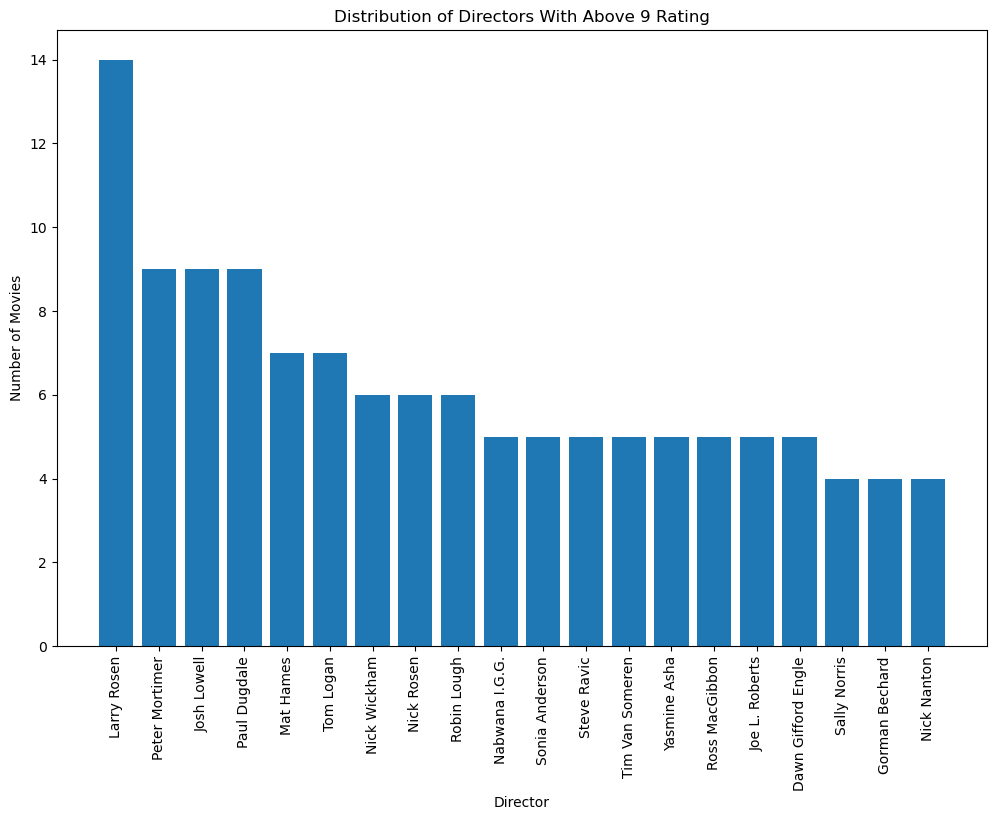

In [59]:
directors_ave9, ax = plt.subplots(figsize=(12,8))

ax.bar(directors_over9[:20].index.tolist(), directors_over9[:20].values.tolist())

ax.set_xlabel("Director")
ax.set_ylabel("Number of Movies")
ax.set_title("Distribution of Directors With Above 9 Rating")
ax.tick_params(axis="x", labelrotation=90);

In [61]:
complete_imdb_over8_actors = complete_imdb_over8[complete_imdb_over8['category'] == 'actor']
complete_imdb_over8_actors

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes,ordering,nconst,category,primary_name,primary_profession,known_for_titles,directors
414,tt6744360,Lost Transmissions,Lost Transmissions,2019,Drama,8.5,12,3,nm0670408,actor,Simon Pegg,"actor,writer,producer","tt0365748,tt0425112,tt1213663,tt0796366",nm3598014
800,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,"Adventure,Animation,Comedy",8.1,263,1,nm0365480,actor,Anthony Harrison,"actor,writer,producer","tt5615700,tt0298814,tt0137204,tt6461824",nm0365480
801,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,"Adventure,Animation,Comedy",8.1,263,2,nm0003210,actor,C. Ernst Harth,"actor,producer,soundtrack","tt0379725,tt1319743,tt0245674,tt0137204",nm0365480
879,tt1634066,The Cedar's Tears,The Cedar's Tears,2010,"Drama,Mystery,Thriller",8.4,37,1,nm1617048,actor,Nils Oliveto,"actor,producer,director","tt1891862,tt2345527,tt1634066,tt1858494",nm1617048
880,tt1634066,The Cedar's Tears,The Cedar's Tears,2010,"Drama,Mystery,Thriller",8.4,37,2,nm3877081,actor,Andrew Lissade,"actor,producer,production_manager","tt1634066,tt2150846,tt2345527",nm1617048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621149,tt9686048,Rape of the Soul: Second Edition,Rape of the Soul: Second Edition,2019,Documentary,9.2,12,3,nm0841568,actor,Robert Swan,actor,"tt0094226,tt0110632,tt0101393,tt0091217",nm2277748
621165,tt9716778,Gnanaserukku,Gnanaserukku,2018,Drama,8.0,10,2,nm9813806,actor,Veera Eyinan,actor,tt8364794,nm10449369
621184,tt9758582,Wake Me Up,Wake Me Up,2018,Drama,8.4,24,2,nm10240803,actor,Michel Merheb,actor,"tt9763754,tt9758582",nm10240800
621185,tt9758582,Wake Me Up,Wake Me Up,2018,Drama,8.4,24,3,nm10240800,actor,Jude Nassar,"director,actor,writer","tt9758582,tt9763754",nm10240800


In [62]:
actors_over9 = complete_imdb_over8_actors['primary_name'].value_counts()


In [63]:
actors_over9

Achyuth Kumar        9
Kishore Kadam        9
Larry Rosen          9
Subodh Bhave         8
Sergey A.            8
                    ..
Julian Monterrey     1
Anil Nedumangad      1
Chandramohan         1
Pradeep Kharab       1
Christian Semaani    1
Name: primary_name, Length: 13051, dtype: int64

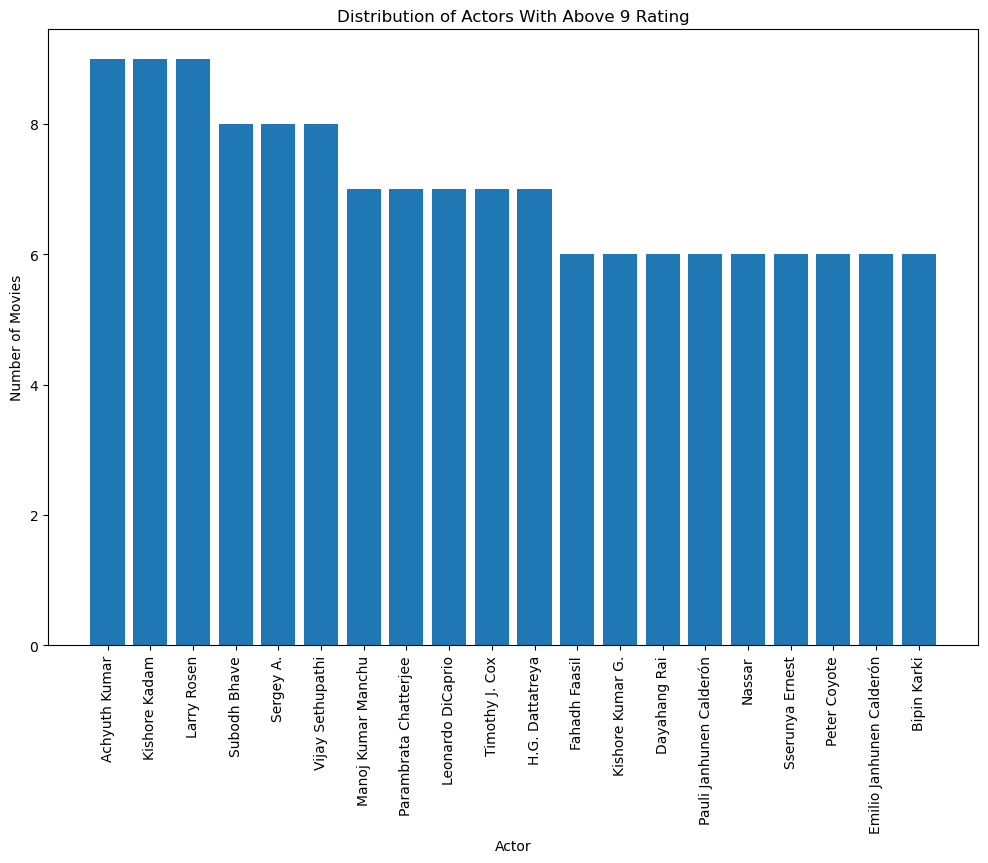

In [64]:
actors_ave9, ax = plt.subplots(figsize=(12,8))

ax.bar(actors_over9[:20].index.tolist(), actors_over9[:20].values.tolist())

ax.set_xlabel("Actor")
ax.set_ylabel("Number of Movies")
ax.set_title("Distribution of Actors With Above 9 Rating")
ax.tick_params(axis="x", labelrotation=90);

Analysis of the movie_budgets to see profits

In [8]:
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,3.536853e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,1.286728e+09
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,1.925247e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.862020e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.936903e+09
...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0.000000e+00
79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,2.889770e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,2.676000e+03


In [90]:
movie_budgets['total_gross'] = movie_budgets['total_gross'].astype('int')

In [79]:
movie_budgets['worldwide_gross'] = movie_budgets['domestic_gross'].astype('int')

In [86]:
movie_budgets['total_gross'] = movie_budgets['total_gross'].str.strip('-')

In [9]:
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,3.536853e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,1.286728e+09
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,1.925247e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.862020e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.936903e+09
...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0.000000e+00
79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,2.889770e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,2.676000e+03


In [13]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int32  
 3   domestic_gross     5782 non-null   int32  
 4   worldwide_gross    5782 non-null   float64
 5   total_gross        5782 non-null   float64
dtypes: float64(2), int32(2), object(2)
memory usage: 271.0+ KB


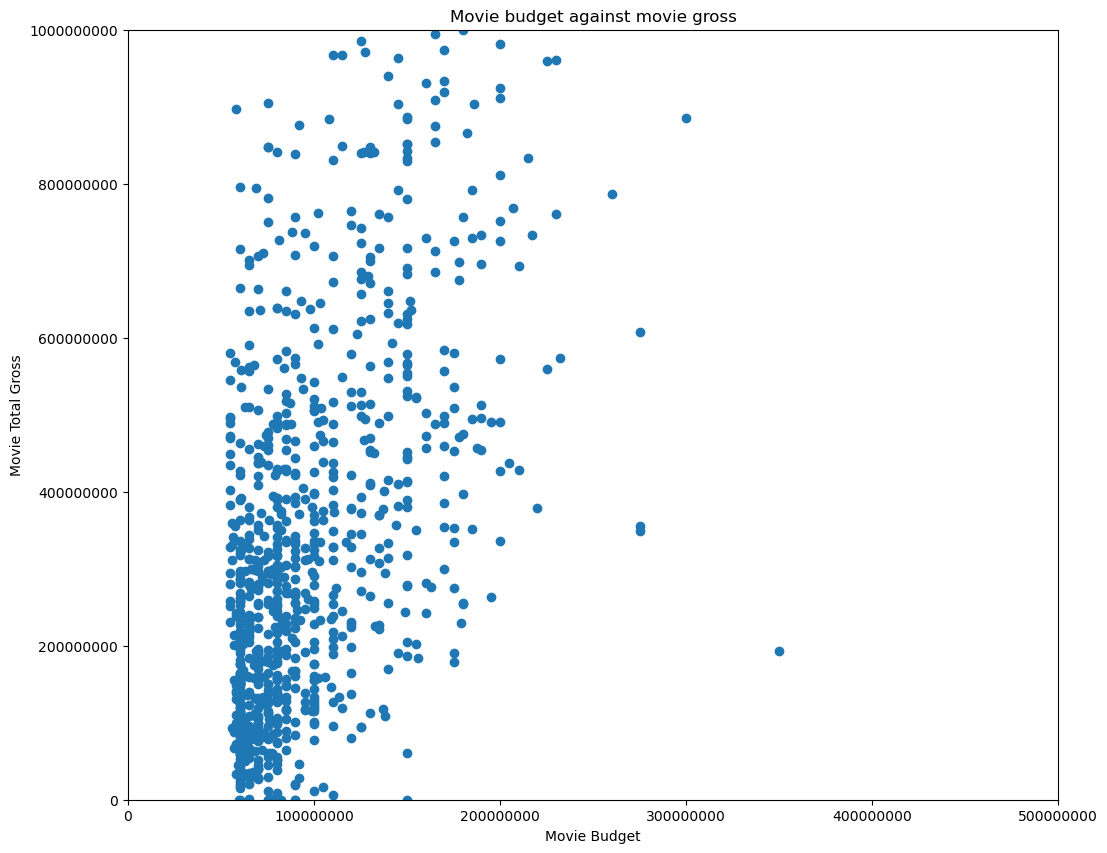

In [19]:
moviebudgets, ax = plt.subplots(figsize=(12,10))

ax.plot(movie_budgets['production_budget'][:1000], movie_budgets['total_gross'][:1000], 'o')

ax.set_xlim([0, 500000000])
ax.set_ylim([0, 1000000000])
ax.set_xlabel("Movie Budget")
ax.set_ylabel("Movie Total Gross")
ax.set_title("Movie budget against movie gross")
ax.set_xticks([0, 100000000, 200000000, 300000000, 400000000, 500000000])
ax.set_yticks([0, 200000000, 400000000, 600000000, 800000000, 1000000000])
ax.ticklabel_format(style='plain', axis='both')
